# Hospital_Complication_Data_Analysis

## Abstract:

The goal of this project is to use the dataset of **complications in U.S. hospitals** and analyse it by using Pandas library.

Each observation represents the number of complications and the 30-day death rate for a specific complication in a specific hospital.

## Overview

In [1]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.4f}'.format

In [2]:
%matplotlib inline

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### Reading the complication dataset

In [4]:
cd = pd.read_csv('complications.csv', dtype=str).rename(columns=lambda x: x.strip())

#### The columns are as follows:

In [5]:
cd.columns

Index(['Provider ID', 'Hospital Name', 'Address', 'City', 'ZIP Code',
       'County Name', 'Phone Number', 'Year', 'Measure ID', 'Measure Name',
       'Denominator', 'Score', 'Lower Estimate', 'Higher Estimate'],
      dtype='object')

| Column Name | Description|
|-------------|------------|
|Provider ID | Unique ID of the hospital |
|Hospital Name| Name of the hospital|
|Address| Address of the hospital|
|City| Name of the city the hospital is in |
|ZIP Code | Postal code of the hospital|
|County Name | Name of the county the hospital is in|
|Phone Number | Phone number of the hospital |
|Year | The year in which the complications were recorded|
|Measure ID | Code for the complication |
|Measure Name | Name of the complication|
|Denominator| Number of underlying medical procedures|
|Score | Estimate for number of serious complications |
|Lower Estimate | Lower boundary of score|
|Higher Estimate | Upper boundary of score|

#### A quick overview of the dataset:

In [6]:
cd.describe()

,Provider ID,Hospital Name,Address,City,ZIP Code,County Name,Phone Number,Year,Measure ID,Measure Name,Denominator,Score,Lower Estimate,Higher Estimate
count,272788,272788,272788,272788,272788,272626,272788,272788,272788,272788,272788,272788,272788,272788
unique,4746,5119,4915,2874,4368,1526,5028,6,26,26,23609,5306,7795,10073
top,140065,MEMORIAL HOSPITAL,100 HOSPITAL DRIVE,CHICAGO,76104,LOS ANGELES,6104022273,2013,MORT_30_PN,Pneumonia (PN) 30-Day Mortality Rate,26,0.06,0,0.06
freq,89,710,378,1957,353,5421,178,58668,24942,24942,1435,2950,23907,2897


#### A sample of the dataset:

In [7]:
cd.sample(5, random_state=1234).head()

,Provider ID,Hospital Name,Address,City,ZIP Code,County Name,Phone Number,Year,Measure ID,Measure Name,Denominator,Score,Lower Estimate,Higher Estimate
22678,50222,SHARP CHULA VISTA MEDICAL CENTER,751 MEDICAL CENTER COURT,CHULA VISTA,91911,SAN DIEGO,6195025800,2016,MORT_30_PN,Pneumonia (PN) 30-Day Mortality Rate,474,14.3,12.1,16.8
22088,50191,ST MARY MEDICAL CENTER,1050 LINDEN AVE,LONG BEACH,90813,LOS ANGELES,5624919000,2012,PSI_14_POSTOP_DEHIS,A wound that splits open after surgery on the...,102,1.78,0,3.64
111295,201309,MAYO REGIONAL HOSPITAL,897 WEST MAIN STREET,DOVER FOXCROFT,4426,PISCATAQUIS,2075644251,2014,MORT_30_STK,Death rate for stroke patients,43,14.1,10.2,18.9
44865,100012,LEE MEMORIAL HOSPITAL,2776 CLEVELAND AVE,FORT MYERS,33901,LEE,2393321111,2012,MORT_30_PN,Pneumonia (PN) 30-Day Mortality Rate,971,10.6,8.9,12.5
208974,390194,BLUE MOUNTAIN HOSPITAL-GNADEN HUETTEN CAMPUS,211 NORTH 12TH STREET,LEHIGHTON,18235,CARBON,6073771300,2016,MORT_30_STK,Death rate for stroke patients,72,15.7,11.7,20.8


# Transforming relevant columns

All columns in the dataset are of type `str` (to preserve the ZIP code information). For **five** columns, str is the wrong type. 

Data Type for following columns need to be changed and the reason to change them are-
* Year- It can be changed to *int* or *datetime*, as there is not any date time manipulation, I am changing it into int
* Denominator- This needs to be changed to *float* as we may need to do arithmatic operation and it has decimal values
* Score- This needs to be changed to *float* as we may need to do arithmatic operation and it has decimal values
* Lower Estimate- This needs to be changed to *float* as we may need to do arithmatic operation and it has decimal values
* Higher Estimate- This needs to be changed to *float* as we may need to do arithmatic operation and it has decimal values

In order to do this, I have used **to_numeric()** function


In [8]:
cd['Year'] = pd.to_numeric(cd['Year'],errors='coerce')
cd['Denominator'] = pd.to_numeric(cd['Denominator'],errors='coerce')
cd['Score'] = pd.to_numeric(cd['Score'],errors='coerce')
cd['Lower Estimate'] = pd.to_numeric(cd['Lower Estimate'],errors='coerce')
cd['Higher Estimate'] = pd.to_numeric(cd['Higher Estimate'],errors='coerce')

# Creating ratio between the score and the denominator

Creating a new column in the dataset that contains the ratio value.

In [9]:
cd['Ratio']=cd['Score']/cd['Denominator']

In [10]:
cd.sample(2)

,Provider ID,Hospital Name,Address,City,ZIP Code,County Name,Phone Number,Year,Measure ID,Measure Name,Denominator,Score,Lower Estimate,Higher Estimate,Ratio
17809,50075,KAISER FOUNDATION HOSPITAL - OAKLAND/RICHMOND,275 W MACARTHUR BOULEVARD,OAKLAND,94611,ALAMEDA,5107521000,2012,PSI_15_ACC_LAC,Accidental cuts and tears from medical treatment,1331.0000,2.4100,0.7200,4.0900,0.0018
15514,50013,ST HELENA HOSPITAL,10 WOODLAND ROAD,SAINT HELENA,94574,NAPA,7079633611,2014,PSI_3_ULCER,Pressure sores,670.0000,0.2500,0.0000,1.3400,0.0004


# Creating an overview of the ratio for deathly complications

Following analysis will be done-
0. **Identifying 'deathly' complications**
1. **Creating the overview**
2. **Choosing an appropriate measure to aggregate the data**
2. **Sorting with the highest ratio on top**

#### Identifying and creating dataframe for  'deathly' complications

Deathly complications have been identified based on the description of the Measure Name. Dataset is filtered based on the keyword **'Death or Mortality'** in the Measure Name 

In [11]:
deathly_complications=cd[cd['Measure Name'].str.contains('Death|Mortality')]

In [12]:
deathly_complications.sample(1)

,Provider ID,Hospital Name,Address,City,ZIP Code,County Name,Phone Number,Year,Measure ID,Measure Name,Denominator,Score,Lower Estimate,Higher Estimate,Ratio
165811,330188,MOUNT ST MARY'S HOSPITAL AND HEALTH CENTER,5300 MILITARY ROAD,LEWISTON,14092,NIAGARA,7162974800,2014,MORT_30_HF,Heart failure (HF) 30-Day Mortality Rate,183.0000,11.7000,8.9000,15.2000,0.0639


#### Count of each deathly complications in the deathly_complications dataframe

In [13]:
deathly_complications.groupby('Measure Name')['Measure Name'].count().sort_values()

Measure Name
Death rate for CABG                                                          3102
Deaths among Patients with Serious Treatable Complications after Surgery     7515
Acute Myocardial Infarction (AMI) 30-Day Mortality Rate                     14817
Death rate for stroke patients                                              16593
Death rate for chronic obstructive pulmonary disease (COPD) patients        21738
Heart failure (HF) 30-Day Mortality Rate                                    22275
Pneumonia (PN) 30-Day Mortality Rate                                        24942
Name: Measure Name, dtype: int64

Count of each Deathly Complication can now be seen

#### A quick overview of the deathly_complications dataframe:

In [14]:
deathly_complications.describe()

,Year,Denominator,Score,Lower Estimate,Higher Estimate,Ratio
count,110982.0000,110982.0000,110982.0000,110982.0000,110982.0000,110982.0000
mean,2013.5030,224.0214,16.5671,14.2877,26.0448,0.1524
std,1.6742,226.1429,19.3962,19.4632,38.7381,0.1696
min,2011.0000,25.0000,1.3000,0.7000,2.1000,0.0016
25%,2012.0000,74.0000,10.0000,7.5000,13.0000,0.0382
50%,2014.0000,146.8600,12.9000,9.9000,16.6000,0.0841
75%,2015.0000,295.0000,15.2000,11.8000,19.3000,0.2053
max,2016.0000,3373.0000,183.4200,172.8050,244.7000,0.9997


#### Aggregating the data by city and sorting with the highest ratio on top

In [15]:
deathly_complications.groupby('City')['Ratio'].mean().sort_values(ascending=False).head()

City
GENOA      0.7520
MORRISON   0.6885
ACKERMAN   0.6346
ALTURAS    0.6276
ELKADER    0.6240
Name: Ratio, dtype: float64

This is the average deathly complications across cities. Genoa has the highest ratio for deathly complication

# Identifying the five safest hospitals

Again will work with **'deathly_complication'** dataframe

The goal is to provide a **list** of **Five Safe hospitals** 

Safe hospitals will be those which has on average, the lowest rate of deadly complications.  

In [16]:
Safe_Hospital=deathly_complications.groupby('Hospital Name')['Ratio'].mean().nsmallest(5)
Safe_Hospital

Hospital Name
UNIVERITY OF MD BALTO WASHINGTON  MEDICAL CENTER   0.0206
NEW YORK-PRESBYTERIAN HOSPITAL                     0.0220
NORTON HOSPITALS, INC                              0.0226
SAN JUAN VA MEDICAL CENTER                         0.0240
FLORIDA HOSPITAL                                   0.0256
Name: Ratio, dtype: float64

#### The list of Five Safest Hospital

In [17]:
Safe_Hospital=Safe_Hospital.index.tolist()
Safe_Hospital

['UNIVERITY OF MD BALTO WASHINGTON  MEDICAL CENTER',
 'NEW YORK-PRESBYTERIAN HOSPITAL',
 'NORTON HOSPITALS, INC',
 'SAN JUAN VA MEDICAL CENTER',
 'FLORIDA HOSPITAL']

# Augmenting the datset with information about the state

Reading the file `geo-data.csv` into an object `zip_codes`. **Reading all columns as string.** ([Link](https://github.com/scpike/us-state-county-zip))

In [18]:
zip_codes=pd.read_csv("geo-data.csv", dtype=str)

This file contains information about the relationship of zip codes, counties, and U.S. states. 

In [19]:
zip_codes.columns

Index(['state_fips', 'state', 'state_abbr', 'zipcode', 'county', 'city'], dtype='object')

| Column Name | Description|
|-------------|------------|
|state_fips | FIPS code for the state |
|state| Name of the state|
|state_abbr| Abbreviation of the state|
|zipcode | Postal code|
|county | County name|
|city | City name  |

### Combining the datasets:

Dataset on complications needs to be combined with the dateset on zip codes so that it will have even more details of each observation.

In order to do this, **Zip Code** is used to perform **Inner Join**, because a county or city can have multiple Zip codes
Therefore granularity wise Zip code is at the lowest level

In [20]:
new_df=pd.merge(cd,zip_codes, how='inner', left_on='ZIP Code', right_on='zipcode')
new_df.head(2)

,Provider ID,Hospital Name,Address,City,ZIP Code,County Name,Phone Number,Year,Measure ID,Measure Name,...,Score,Lower Estimate,Higher Estimate,Ratio,state_fips,state,state_abbr,zipcode,county,city
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,36301,HOUSTON,3347938701,2011,COMP_HIP_KNEE,Rate of complications for hip/knee replacement...,...,3.7000,2.5000,5.5000,0.0104,1,Alabama,AL,36301,Houston,Taylor
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,36301,HOUSTON,3347938701,2012,COMP_HIP_KNEE,Rate of complications for hip/knee replacement...,...,3.8000,2.5500,5.6000,0.0110,1,Alabama,AL,36301,Houston,Taylor


# Creating an overview of the complications per U.S. state

Following analysis will be done-

* Return a sorted list with the overall complication rate per state
* Overview of the complication per US state
* **Best** ten states and their Visualization

#### Return a sorted list with the overall complication rate per state.

Creating a dataframe having on average complication rate of each state in a sorted form

In [21]:
cs=pd.DataFrame(new_df.groupby('state')['Ratio'].mean().sort_values().reset_index())

#### A quick overview of the complication per US state

In [22]:
cs.describe()

,Ratio
count,51.0000
mean,0.1153
std,0.0347
min,0.0617
25%,0.0909
50%,0.1061
75%,0.1346
max,0.2101


#### Best ten states

The states with the lowest complication will be considered as best state

In [23]:
cs_ten_state=cs.head(10)
cs_ten_state

,state,Ratio
0,New jersey,0.0617
1,Delaware,0.0634
2,Maryland,0.0685
3,Massachusetts,0.0698
4,Connecticut,0.0709
5,Rhode island,0.0733
6,Florida,0.0756
7,District of columbia,0.0777
8,Virginia,0.0796
9,Pennsylvania,0.0869


The insights can also be seen by the graph presented below

Populating the interactive namespace from numpy and matplotlib


Text(0.5,1,'Best ten states')

Text(0,0.5,'Ratio')

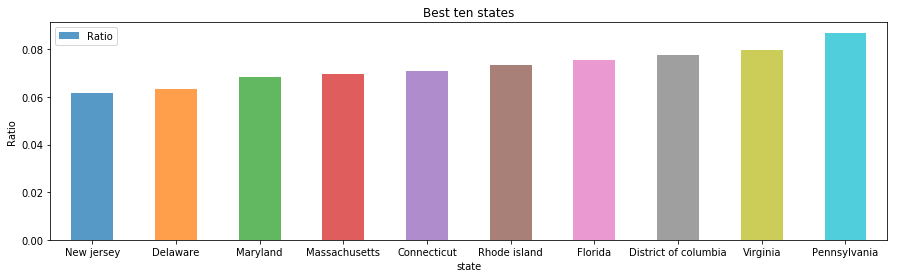

In [24]:
%pylab inline
cs_ten_state.plot(x='state',y='Ratio',kind="bar", alpha=0.75, rot=0,  figsize=(15,4))
plt.title('Best ten states')
plt.ylabel('Ratio')

# Creating an overview of the change in complications across U.S. states

* Focusing on the deadly complications only.
* Calculating the change as follows: 
**(average rate for last year in dataset - average rate for first year in dataset)/(average rate for first year in dataset)**
* Visualizing the change in complication across US states

This can be done using the **pct_change** function with appropriate value for window size. The window size is the parameter which is passed to the pct_change function.

If the value is positive, then its a percent increase, if negative then its percent decrease

#### Combining  Deadly Complication  with the Zip Code dataset

In [25]:
dc=pd.merge(deathly_complications,zip_codes, how='inner', left_on='ZIP Code', right_on='zipcode')
dc.head(1)

,Provider ID,Hospital Name,Address,City,ZIP Code,County Name,Phone Number,Year,Measure ID,Measure Name,...,Score,Lower Estimate,Higher Estimate,Ratio,state_fips,state,state_abbr,zipcode,county,city
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,36301,HOUSTON,3347938701,2011,MORT_30_AMI,Acute Myocardial Infarction (AMI) 30-Day Morta...,...,13.0000,10.9000,15.6000,0.0195,1,Alabama,AL,36301,Houston,Taylor


#### Calculating the window size so that it will work for any dataset

In [26]:
pct_window=len(dc['Year'].unique())-1 
pct_window

5

*Calculating the window size will help to make the calculation of percent change more dynamic and efficient. So now if we pass this dataset with more years, this entire analysis will be reusable*

#### Calculating the Percent change of Ratio across states 

In [27]:
df=pd.DataFrame((dc.groupby(['state','Year'])['Ratio'].mean()).groupby('state').pct_change(pct_window)*100).reset_index()
df=df[df['Ratio'].notnull()]
df[['state','Ratio']].head()

,state,Ratio
5,Alabama,-7.3611
11,Alaska,-9.1222
17,Arizona,-13.8024
23,Arkansas,0.7186
29,California,-0.0623


#### Visualizing the change in Deadly Complication across states

The insights can also be seen by the graph presented below

Populating the interactive namespace from numpy and matplotlib


Text(0.5,1,'Change in complication acrross US states')

Text(0,0.5,'Ratio')

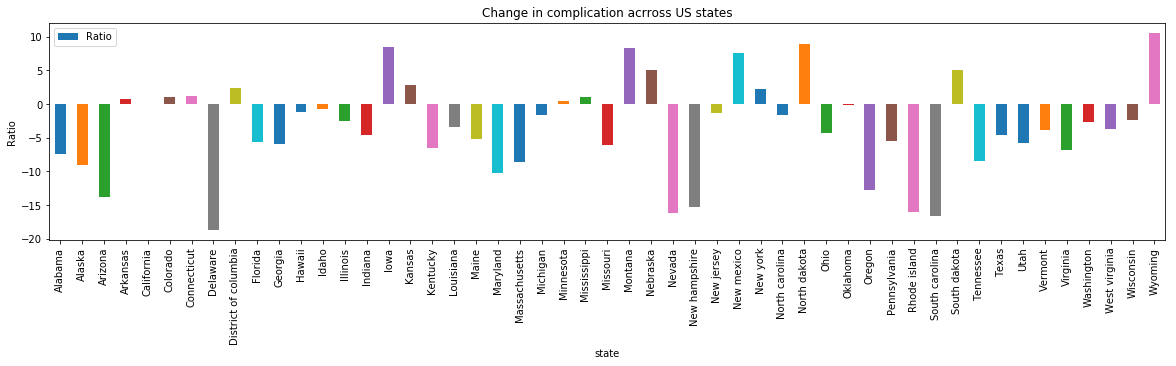

In [28]:
%pylab inline
df.plot(x='state',y='Ratio',kind="bar",figsize=(20, 4))
plt.title('Change in complication acrross US states')
plt.ylabel('Ratio')

**The issue with this data is that it does not have state as an index.**
**So In order to return state name with the function like nlargest or nsmallest, It needs to be set as an index**

In [29]:
df=df.set_index('state')

#### State that improved the most

In [30]:
df['Ratio'].nsmallest(1)

state
Delaware   -18.7448
Name: Ratio, dtype: float64

Based on the percent change we can see that the state **Delaware** has the maximum percent decrease. It means the deathly complication for this state has been decreased over years because of the improvement

#### State with the worst development

In [31]:
df['Ratio'].nlargest(1)

state
Wyoming   10.6098
Name: Ratio, dtype: float64

Based on the percent change we can see that the state **Wyoming** has the maximum percent increase. It means the deathly complication for this state has been increased over years and it has the worst development compare to other states

## Identifying State which has worst development for 'Deaths among Patients with Serious Treatable Complications after Surgery'

#### Creating the dataframe for the Measure - 'Deaths among Patients with Serious Treatable Complications after Surgery'

In [32]:
dc=dc[dc['Measure Name']=='Deaths among Patients with Serious Treatable Complications after Surgery']
dc.head(1)

,Provider ID,Hospital Name,Address,City,ZIP Code,County Name,Phone Number,Year,Measure ID,Measure Name,...,Score,Lower Estimate,Higher Estimate,Ratio,state_fips,state,state_abbr,zipcode,county,city
33,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,36301,HOUSTON,3347938701,2012,PSI_4_SURG_COMP,Deaths among Patients with Serious Treatable C...,...,136.1800,101.1800,171.1900,0.7205,1,Alabama,AL,36301,Houston,Taylor


#### Calculating the Window size 

In [33]:
pct_window=len(dc['Year'].unique())-1 
pct_window

3

#### Calculating the Percent change across state of US

In [34]:
dx=pd.DataFrame((dc.groupby(['state','Year'])['Ratio'].mean()).groupby('state').pct_change(pct_window)*100).reset_index()
dx=dx[dx['Ratio'].notnull()]

#### Visualizing the change in complication across state

Populating the interactive namespace from numpy and matplotlib


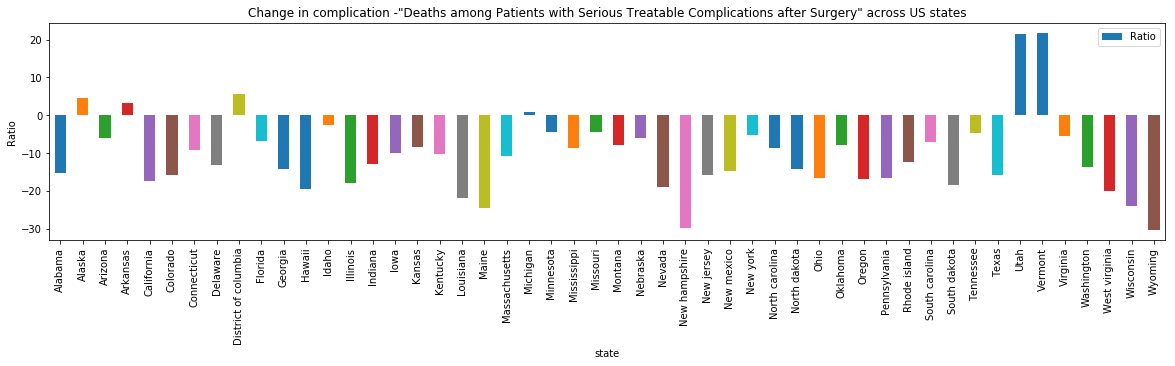

In [35]:
%pylab inline
dx.plot(x='state',y='Ratio',kind="bar",figsize=(20, 4))
plt.title('Change in complication -"Deaths among Patients with Serious Treatable Complications after Surgery" across US states')
plt.ylabel('Ratio');

**The issue with this data is that it does not have state as an index.**
**So In order to return state name with the function like nlargest or nsmallest, It needs to be set as an index**

In [36]:
dx=dx.set_index('state')

#### The state which has the worst development for 'Deaths among Patients with Serious Treatable Complications after Surgery'

In [37]:
dx['Ratio'].nlargest(1)

state
Vermont   21.8185
Name: Ratio, dtype: float64

**Utah** has the worst development for **'Deaths among Patients with Serious Treatable Complications after Surgery'** among the US states